<a href="https://colab.research.google.com/github/YugantGotmare/Machine-Learning-Projects/blob/master/Prediction_using_Decision_Tree_Algorithm_(spark).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name - Yugant Gotmare

# Task

# Create the Decision Tree classifier and visualize it graphically.
# The purpose is if we feed any new data to this classifier, it would be able to
# predict the right class accordingly.

## Decision Tree - A decision tree is a machine learning algorithm that builds a tree-like model to make predictions based on data. It splits the data based on features that provide the most information gain, recursively creating nodes and branches until a stopping criterion is met. The final prediction is made by traversing the tree from the root node to a leaf node. Decision trees are easy to interpret, handle both categorical and numerical data, and require little data preparation. However, they can be sensitive to noise and outliers, prone to overfitting, and biased towards features with many values.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

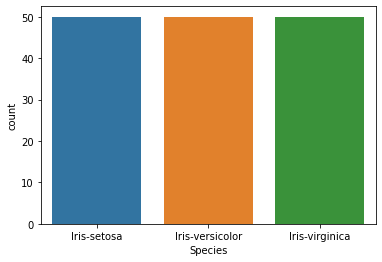

In [7]:
sns.countplot(x='Species', data=df, )
plt.show()

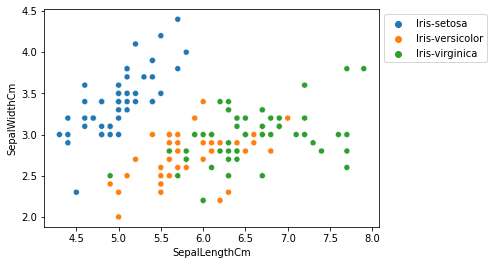

In [8]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

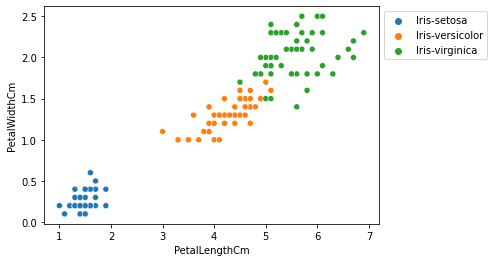

In [9]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

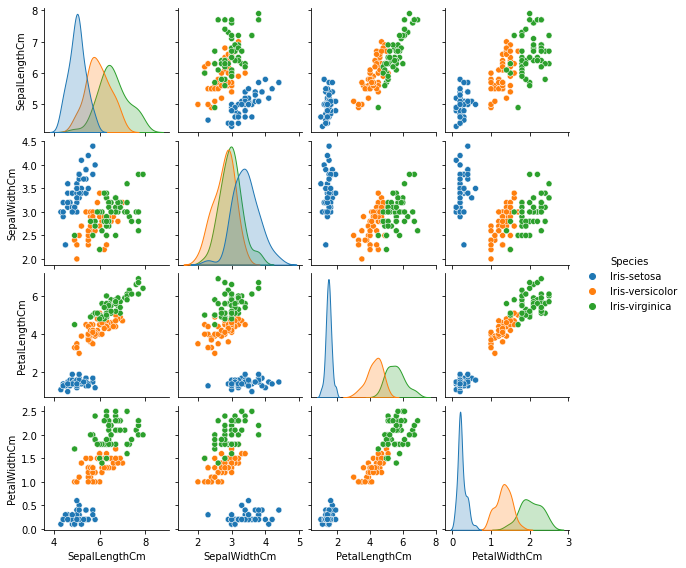

In [10]:
sns.pairplot(df.drop(['Id'], axis = 1),
             hue='Species', height=2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

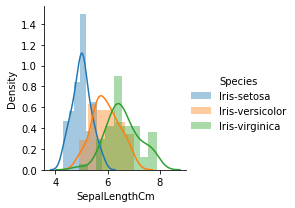

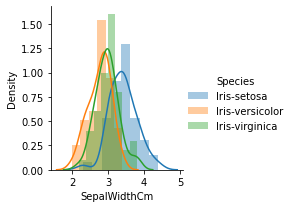

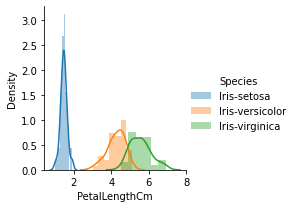

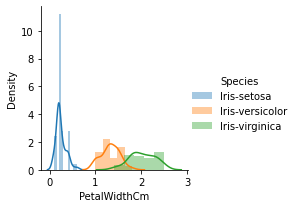

In [12]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
 
plt.show()

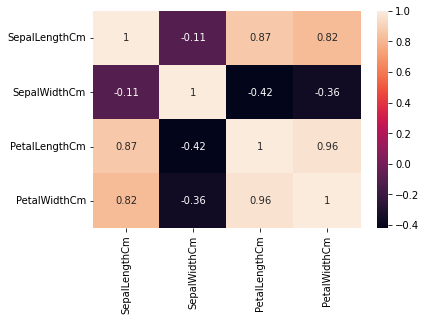

In [11]:
sns.heatmap(df.corr(method='pearson').drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);
 
plt.show()

In [14]:
df.drop(columns=['Id'],inplace=True)

In [21]:
x = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80 20 ratio

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [24]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

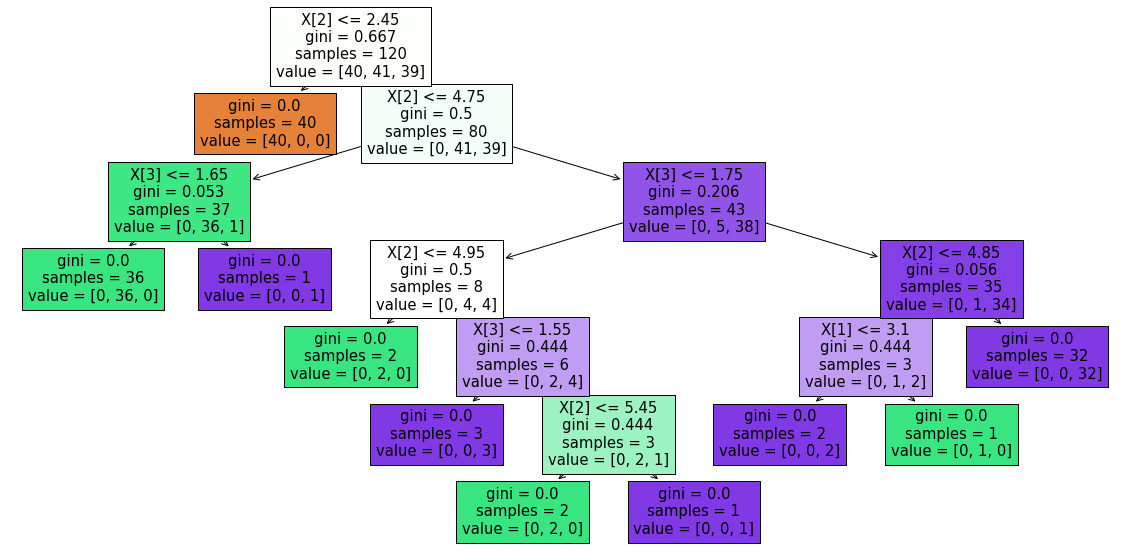

In [25]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()

In [26]:
print("'Accuracy score is:", model.score(x_test,y_test)*100)

'Accuracy score is: 100.0


In [27]:
from sklearn.metrics import accuracy_score

y_hat = model.predict(x_test)
y_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test, y_hat)*100,'%')

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


In [28]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,6.9,3.2,5.7,2.3,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor


In [37]:
data = [[6.9,3.2,5.7,2.3]]

print(model.predict(data))

['Iris-virginica']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
